<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/30QueriesKeysAndValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

Imagine you have a 2x2 grid of heatmaps you want to display. So, num_rows = 2 and num_cols = 2.

axes: This is a conceptual 2D grid (like an array of arrays) where each element is a Matplotlib Axes object. Think of it as:

[ [subplot_top_left, subplot_top_right],
  [subplot_bottom_left, subplot_bottom_right] ]
matrices: This is a conceptual 2D grid (like an array of arrays) where each element is one of your data matrices (e.g., a 3x3 PyTorch tensor). Think of it as:

[ [matrix_data_top_left, matrix_data_top_right],
  [matrix_data_bottom_left, matrix_data_bottom_right] ]
zip(axes, matrices): This takes the first 'row' from axes and pairs it with the first 'row' from matrices, then the second 'row' from axes with the second 'row' from matrices, and so on. It effectively creates pairs of rows.

First output of zip: ([subplot_top_left, subplot_top_right], [matrix_data_top_left, matrix_data_top_right])
Second output of zip: ([subplot_bottom_left, subplot_bottom_right], [matrix_data_bottom_left, matrix_data_bottom_right])
enumerate(...): This function keeps track of the index (i) as it iterates through the pairs generated by zip.

First iteration of enumerate: (0, ([subplot_top_left, subplot_top_right], [matrix_data_top_left, matrix_data_top_right]))
Second iteration of enumerate: (1, ([subplot_bottom_left, subplot_bottom_right], [matrix_data_bottom_left, matrix_data_bottom_right]))
for i, (row_axes, row_matrices) in ...: This is how the values are assigned in each loop cycle.

During the first loop iteration (for the top row):

i will be 0 (indicating the first row).
row_axes will be [subplot_top_left, subplot_top_right] (the list of Matplotlib Axes objects for the top row).
row_matrices will be [matrix_data_top_left, matrix_data_top_right] (the list of data matrices for the top row).
During the second loop iteration (for the bottom row):

i will be 1 (indicating the second row).
row_axes will be [subplot_bottom_left, subplot_bottom_right] (the list of Matplotlib Axes objects for the bottom row).
row_matrices will be [matrix_data_bottom_left, matrix_data_bottom_right] (the list of data matrices for the bottom row).
So, this line essentially allows you to process the heatmaps row by row, with i giving you the current row number, and row_axes and row_matrices providing all the subplot objects and data for that entire row, respectively. The inner loop then handles processing each individual subplot within that row.

------------

Let's break down that line: pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap).

Imagine you have a grid of numbers, like a spreadsheet, and you want to visually represent these numbers using colors. This is what a heatmap does.

matrix.detach().numpy():

matrix: This is your raw data, likely a PyTorch tensor (a multi-dimensional array used in deep learning). For instance, it could be a 10x10 grid of numbers representing how much attention one part of a sequence pays to another.
.detach(): If your matrix is part of a computation graph (meaning PyTorch is tracking operations on it for things like gradient calculations), .detach() creates a new tensor that is not part of that graph. This is useful because we just want to visualize the values, not modify them or track their changes.
.numpy(): Matplotlib's imshow function works best with NumPy arrays. This method converts the PyTorch tensor into a NumPy array, which is a standard data structure for numerical operations in Python.
Example: If your matrix was torch.tensor([[0.1, 0.9], [0.8, 0.2]]), matrix.detach().numpy() would give you numpy.array([[0.1, 0.9], [0.8, 0.2]]).
ax.imshow(...):

ax: This refers to a specific Axes object in a Matplotlib plot. Think of ax as one individual plot area within a larger figure that might contain multiple plots.
imshow(): This Matplotlib function is used to display data as an image. It takes a 2D array (like your matrix after converting it to NumPy) and assigns colors to each cell based on its value. Higher values might get one color, lower values another, and so on.
Example: If your NumPy array is [[0.1, 0.9], [0.8, 0.2]], ax.imshow() would draw a 2x2 grid. If 0.1 is light blue and 0.9 is dark blue, the top-right cell would be dark blue, and the bottom-left would be light blue.
cmap=cmap:

cmap: This is a parameter that stands for 'colormap'. It tells imshow how to color the data. You provide a string like 'Reds', 'Blues', 'viridis', 'plasma', etc., which defines the gradient of colors that imshow will use to represent the different numerical values.
Example: If cmap='Reds', the lowest values might be white and the highest values dark red, with a smooth transition in between. If cmap='Blues', it would go from white to dark blue.
pcm = ...:

pcm: This is a variable that stores the return value of the ax.imshow() call. The imshow function returns an object that represents the image it just drew. We store this object (often called a ScalarMappable or AxesImage) because it's needed later to create a color bar. The color bar acts like a legend, showing you which numerical values correspond to which colors in your heatmap.
In essence, that line takes your numerical data, prepares it for plotting, displays it as a colored grid on a specific plot area, using a chosen color scheme, and keeps a reference to the plotted image so you can add a color bar later.

In [2]:
import matplotlib.pyplot as plt

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """Show heatmaps of matrices."""
    num_rows, num_cols, _, _ = matrices.shape
    print(num_rows, num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        print('i, row_axes, row_matrices ', i, row_axes, row_matrices)
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            print('j, ax, matrix ', j, ax, matrix)
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            print(pcm)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)
    plt.show() # Added plt.show() to display the plot

torch.eye(10) creates a 2-dimensional tensor (a matrix) with ones on the diagonal and zeros elsewhere. This is commonly known as an identity matrix.

The number 10 you provide as an argument specifies the dimensions of this square matrix. So, torch.eye(10) will create a 10x10 (10 rows by 10 columns) matrix.

What value it returns:

It will return a torch.Tensor of shape (10, 10) with the following characteristics:

Its data type will typically be torch.float32 by default.
All elements along the main diagonal (where the row index equals the column index) will be 1.0.
All other elements (off-diagonal) will be 0.0.
Here's a conceptual representation of what a smaller torch.eye(3) would look like:

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
So, torch.eye(10) will be a 10x10 version of this, a square matrix with ones running from the top-left to the bottom-right corner, and zeros everywhere else.

-------

The 10x10 image is created by the ax.imshow(matrix.detach().numpy(), cmap=cmap) line within the show_heatmaps function. Let's trace how that 10x10 data gets there:

torch.eye(10): This is the very first step. torch.eye(10) directly creates a 2D PyTorch tensor (a matrix) of size 10x10. This matrix has ones along its main diagonal and zeros everywhere else.

At this point, you have a 10x10 grid of numbers.
.reshape((1, 1, 10, 10)): The .reshape operation does not change the actual values in the tensor, only how they are organized or perceived. It takes the 10x10 matrix and wraps it in two extra dimensions, making its shape (1, 1, 10, 10).

This reshape is done to make the attention_weights compatible with the show_heatmaps function's expectation of a 4D tensor (batch, head, height, width) even though you only have one 'batch' and one 'head'.
Passing to show_heatmaps: When show_heatmaps(attention_weights, ...) is called:

num_rows becomes 1 (from the first 1 in (1, 1, 10, 10)).
num_cols becomes 1 (from the second 1 in (1, 1, 10, 10)).
The loop iterates only once, with i=0 and j=0.
Inside the loop, matrix receives attention_weights[0, 0], which is your original 10x10 identity matrix.
ax.imshow(matrix.detach().numpy(), cmap=cmap): This is the crucial step:

matrix.detach().numpy() converts the 10x10 PyTorch tensor into a 10x10 NumPy array.
ax.imshow() then takes this 10x10 NumPy array. The imshow function interprets each value in this 10x10 array as a pixel or a cell in a grid, assigning a color based on its value and the cmap (colormap).
Since the input array is 10x10, imshow draws a visual representation of that 10x10 grid of numbers, where each cell in the 10x10 grid has a specific color based on its value (1s are one color, 0s are another).
So, the 10x10 image is created because the individual matrix that imshow receives is already 10x10.

tensor([[[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]]])
1 1
i, row_axes, row_matrices  0 [<Axes: >] tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0.,

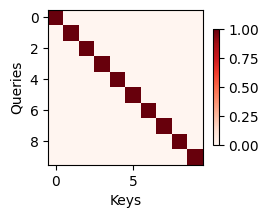

In [3]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
print(attention_weights)
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')